<center>
    <h2><b>Homework 1</b></h2>

Martim Aires de Sousa - 106468  
Cristiano Pantea - 106324
</center>

#### **Importação dos dados**

In [2]:
import numpy as np
import pandas as pd
from scipy.io import arff

# Carregar e preparar o dataset
data, meta = arff.loadarff('diabetes.arff')
df = pd.DataFrame(data.tolist(), columns=meta.names())
df['Outcome'] = df['Outcome'].str.decode('utf-8')

# Extrair features e diagnosis
features = df.drop(columns=['Outcome']).astype(float)  # Todas as colunas, exceto 'Outcome'
diagnosis = df['Outcome'].astype(int)  # Coluna 'Outcome' como inteiros

#### **Exercício 1**

In [3]:
from sklearn.feature_selection import f_classif

# Calculate the descriminative power for each attribute
f_stat, _ = f_classif(features, diagnosis)

# Calcular F-statistics e identificar as variáveis
F_stat, _ = f_classif(features, diagnosis)
melhor_var_nome, pior_var_nome = df.columns[np.argmax(F_stat)], df.columns[np.argmin(F_stat)]

# Print the attribute name corresponding to the smallest F-statistic
print("Attribute with worst discriminative power:", pior_var_nome)
print("Attribute with best discriminative power:", melhor_var_nome)

Attribute with worst discriminative power: BloodPressure
Attribute with best discriminative power: Glucose


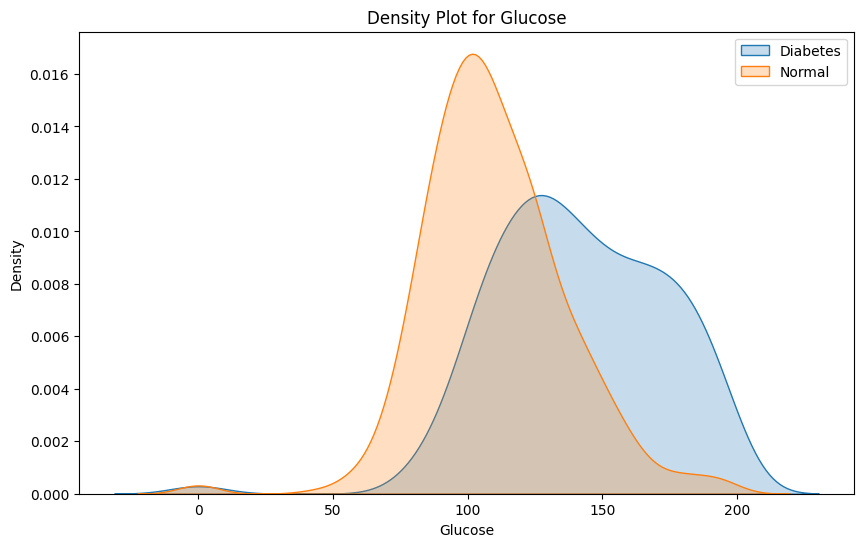

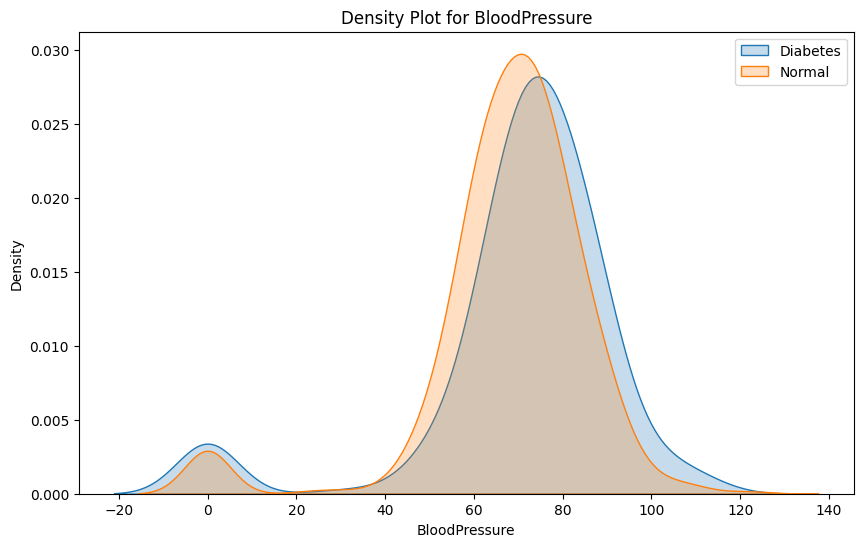

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Função para plotar distribuições
def plot_density(var_name):
    plt.figure(figsize=(10, 6))
    for label in ['1', '0']:
        sns.kdeplot(df[df['Outcome'] == label][var_name], label=f'{"Diabetes" if label == "1" else "Normal"}', fill=True)
    plt.title(f'Density Plot for {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.legend(loc='upper right')
    plt.show()

# Plotar para a melhor e pior variável
plot_density(melhor_var_nome)
plot_density(pior_var_nome)

#### **Exercício 2**

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Stratified 80-20 training-testing split with a fixed seed (random_state=1)
x_train, x_test, y_train, y_test = train_test_split(
    features, diagnosis, test_size=0.2, stratify=diagnosis, random_state=1
)

# Values to set on min_samples_split parameter
min_samples_split_values = [2, 5, 10, 20, 30, 50, 100]
train_accuracy_avg = []
test_accuracy_avg = []

# Create a tree for each min_samples_split value
for split in min_samples_split_values:
    tree = DecisionTreeClassifier(min_samples_split=split)

    # Run 10 times and get an average value
    train_accuracy_sum = 0
    test_accuracy_sum = 0
    for i in range(10):
        # Fit the model on the training data
        tree.fit(x_train, y_train)

        # Predict using both test and train samples
        train_prediction = tree.predict(x_train)
        test_prediction = tree.predict(x_test)

        # Add values to accuracy sum (average calculation later)
        train_accuracy_sum += accuracy_score(y_train, train_prediction)
        test_accuracy_sum += accuracy_score(y_test, test_prediction)
    
    # Calculate an average accuracy value and store it in a list
    train_accuracy_avg.append(train_accuracy_sum / 10)
    test_accuracy_avg.append(test_accuracy_sum / 10)

# Show results
print(train_accuracy_avg)
print(test_accuracy_avg)

[1.0, 0.9731270358306189, 0.9397394136807817, 0.8843648208469055, 0.8485342019543973, 0.8403908794788275, 0.7850162866449512]
[0.7175324675324676, 0.7077922077922079, 0.7097402597402598, 0.7474025974025973, 0.7603896103896103, 0.7597402597402596, 0.7467532467532468]


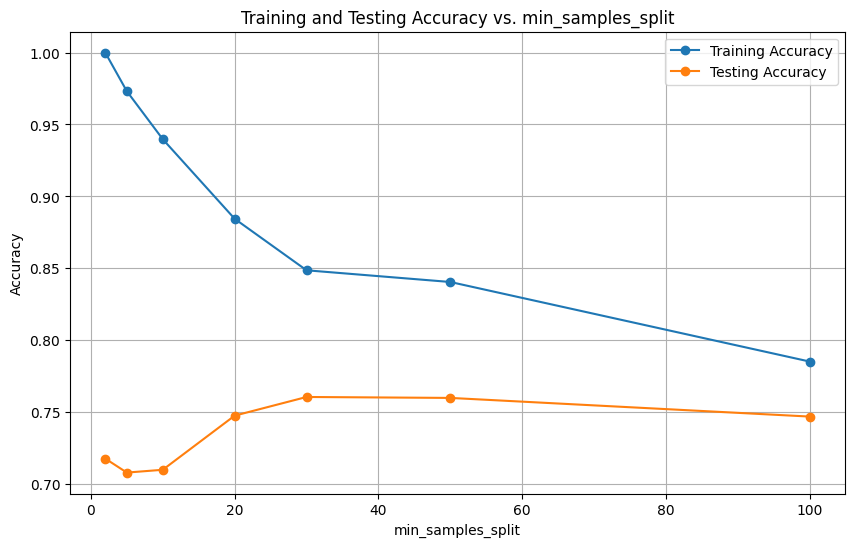

In [6]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(min_samples_split_values, train_accuracy_avg, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(min_samples_split_values, test_accuracy_avg, label='Testing Accuracy', marker='o', linestyle='-')

# Labels and Title
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. min_samples_split')
plt.legend()
plt.grid(True)
plt.show()

#### **Exercício 3**

Os resultados obtidos ao variar o parâmetro min_samples_split na árvore de decisão revelam informações importantes sobre a capacidade de generalização do modelo.  

Quando min_samples_split toma **valores baixos**, a árvore de decisão torna-se excessivamente complexa, pois ocorrem muitos splits. Isto permite que a árvore se ajuste de forma muito precisa aos dados de treino, o que leva a uma alta precisão nesse conjunto.  
No entanto, essa complexidade resulta em overfitting, o que significa que o modelo não generaliza bem para dados novos. Como consequência, a precisão nos dados de teste tende a ser significativamente inferior, tal como se verifica no gráfico acima, uma vez que o modelo está excessivamente adaptado aos dados de treino e não consegue captar as variações presentes em dados exteriores.  

Quando min_samples_split é definido para **valores mais altos**, a árvore de decisão torna-se mais simples e menos profunda, pelo facto de se darem menos splits. Isso resulta num modelo mais generalizado, que consegue captar melhor os dados externos, evitando possíveis variações em comparação com os dados de teste.  
Como consequência, a precisão nos dados de treino diminui, uma vez que a árvore não está tão overfitted e não capta tanto os "ruídos" e variações presentes nesses dados. Em contrapartida, a precisão nos dados externos tende a aumentar, pois o modelo é mais abrangente e generalizável.

#### **Exercício 4**

#### **i.**

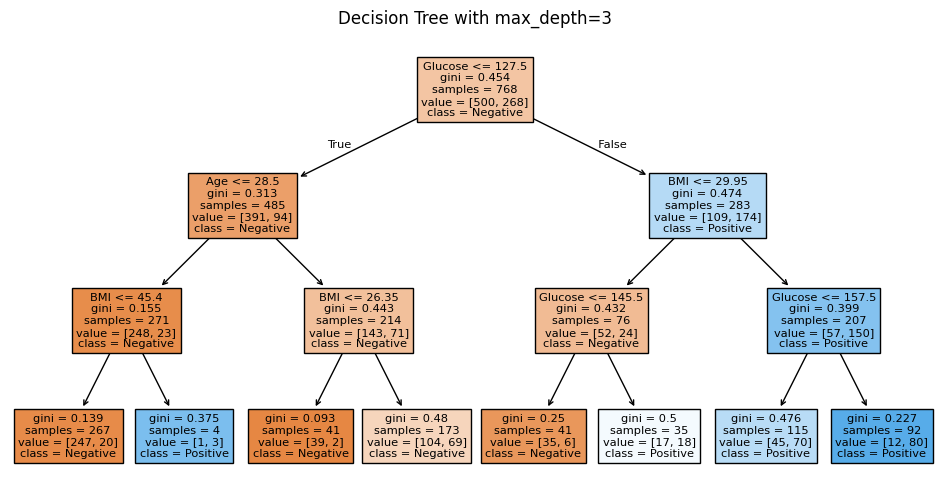

In [7]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Fit the model using all available data
tree = DecisionTreeClassifier(max_depth=3, random_state=1)

# Fit the model on the entire dataset
tree.fit(features, diagnosis)

# Plot the decision tree
plt.figure(figsize=(12, 6))
plot_tree(tree, filled=True, feature_names=features.columns, class_names=['Negative', 'Positive'])
plt.title('Decision Tree with max_depth=3')
plt.show()

#### **ii.**

A análise da árvore de decisão revela que os principais fatores de classificação para pessoas diabéticas são **a glicose**, **o IMC (Índice de Massa Corporal)** e **a idade**. Para verificarmos isso com mais detalhe em cada folha, vamos analisar qual a probabilidade de o paciente ser diabético se tiver certas características determinadas pelos nós das árvores:  

Quando:
- **Glicose ≤ 125.5**:
  - **Idade ≤ 28.5**:
    - **BMI ≤ 45.4**: 7.50%
    - **BMI ≥ 45.4**: 75.00%
  - **Idade ≥ 28.5**:
    - **BMI ≤ 26.35**: 4.88%
    - **BMI ≥ 26.35**: 39.88%

- **Glicose ≥ 125.5**:
  - **BMI ≤ 29.95**:
    - **Glicose ≤ 145.5**: 14.63%
    - **Glicose ≥ 145.5**: 51.43%
  - **BMI ≥ 29.95**:
    - **Glicose ≤ 157.5**: 60.87%
    - **Glicose ≥ 157.5**: 86.96%

Análise Detalhada dos Resultados:
- No **primeiro nó**, a divisão é feita com base nos níveis de **glicose**, indicando que este é um fator forte na previsão de diabetes.
- Quando os níveis de glicose são menores ou iguais a **125.5**, a próxima divisão é realizada com base na **idade**. Caso a glicose seja maior, o próximo critério utilizado é o **IMC**. Isso mostra que **glicose**, **IMC** e **idade** são fatores significativos na determinação do risco de diabetes.

Nas subfolhas, **glicose** e **IMC** são novamente utilizados para as divisões, reforçando o seu poder de previsão no diagnóstico de diabetes. Observamos que:
- Uma pessoa com **glicose elevada** e **IMC elevado** tem uma probabilidade muito maior de ser diabética, em comparação com aquelas que apresentam baixos valores de ambos os fatores.
- No entanto, mesmo indivíduos com **glicose baixa** (≤ 125.5), se forem **mais velhos** (idade > 28.5) e tiverem um **IMC elevado** também apresentam maior probabilidade de desenvolver diabetes.

Percebemos, portanto, que **altos níveis de glicose** e **IMC elevado** são fatores decisivos no diagnóstico de diabetes. Para além disso, a **idade** também exerce um impacto significativo, indicando que pessoas mais velhas tendem a ter maior predisposição para a doença, embora o seu efeito não seja tão marcante quanto os níveis de glicose e IMC.